In [38]:
import pandas as pd
import seaborn as sns
import string 
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,r2_score
from sklearn.svm import SVC

In [39]:
df  = pd.read_csv('spam.csv',encoding='latin-1')

# DataFrame 

In [40]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [42]:
df= df[['v1','v2']]
df.columns = ['Class','Text']

# SPAM and NOT SPAM DISTRIBUTION

<AxesSubplot:xlabel='Class', ylabel='count'>

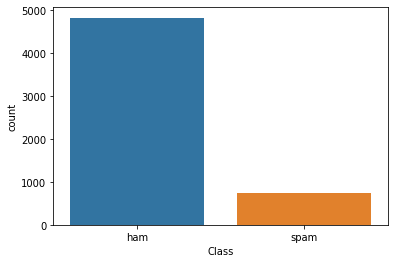

In [43]:
sns.countplot(x = df['Class'])

# Preprocessing 


### Text Cleaing 

In [44]:
def transform_message(message):
    message_not_punc = [] # Message without punctuation
    i = 0
    for punctuation in message:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation.lower())
    # Join words again to form the string.
    message_not_punc = ''.join(message_not_punc) 

    # Remove any stopwords for message_not_punc, but first we should     
    # to transform this into the list.
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for mess in message_clean:
            if mess.lower()  in stopwords.words('english'):
                message_clean.remove(mess.lower())
        i =i +1
    return  message_clean

In [45]:
df['Clean text'] = df['Text'].apply(transform_message)

C:\Users\DHEERA~1\AppData\Local\Temp/ipykernel_18496/3751432763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean text'] = df['Text'].apply(transform_message)


In [46]:
df['Clean text']

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å£750, po...
5568                   [ì, b, going, esplanade, fr, home]
5569                   [pity, , mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: Clean text, Length: 5572, dtype: object

# Text Vectorization 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer


In [15]:
vectorization = CountVectorizer(analyzer=transform_message)
X = vectorization.fit_transform(df["Clean text"])

In [16]:
label = LabelEncoder()
Y  = label.fit_transform(df['Class'])


In [17]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(X)


# Split dataset into train and test 

In [20]:
 x_train, x_test, y_train, y_test = train_test_split(x_tfidf,Y, test_size=0.3,random_state = 50, stratify=Y)

# Model Building 

In [21]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)

MultinomialNB()

In [32]:
print(f' Naice Bayes Accuracy : {accuracy_score(y_test, naive_bayes.predict(x_test)):.3f}')
print(f' Naice Bayes model score : {r2_score(Y, naive_bayes.predict(x_tfidf)):.3f}')

 Naice Bayes Accuracy : 0.866
 Naice Bayes model score : -0.155


In [23]:
# Trying Different Model

In [36]:
kernal = ['linear', 'poly', 'rbf', 'sigmoid']
for kernal in kernal:
    svc = SVC(kernel=kernal).fit(x_train, y_train)
    print(f'SVC model Accuracy : {accuracy_score(y_test, svc.predict(x_test)):.3f}')
    print(f' Naice Bayes model score : {r2_score(Y, svc.predict(x_tfidf)):.3f}')

SVC model Accuracy : 0.898
 Naice Bayes model score : 0.737
SVC model Accuracy : 0.898
 Naice Bayes model score : 0.737
SVC model Accuracy : 0.898
 Naice Bayes model score : 0.737
SVC model Accuracy : 0.868
 Naice Bayes model score : 0.031


# Train Model without Text Cleaning 

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size=0.3,random_state = 50, stratify=df['Class'])

In [55]:
bow = CountVectorizer(stop_words='english')

In [56]:
bow.fit(X_train)

CountVectorizer(stop_words='english')

In [58]:
X_train = bow.transform(X_train)
X_test = bow.transform(X_test)

In [59]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [88]:
print(f'Naice Bayes Accuracy : {accuracy_score(y_test, naive_bayes.predict(X_test))*100} %')


Naice Bayes Accuracy : 98.32535885167464 %


# Insigts 

##### We found that if we build model without cleaning text we got more accuracy. 
##### Here are some reasons:
##### 1) The lenght of text in text columns is less
##### 2) Length of dataset is small for training.
##### 3) Max accuracy obtained from SVC model. So using svc will give better results.
